In [2]:
#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
import pandas as pd 

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.8MB/s 


In [0]:
file_id = '1vVzNw5LN4ZyA5dvxX1eUIzqSUc7UcPkM'
downloaded = drive.CreateFile({'id': file_id})

In [0]:
downloaded.GetContentFile('terrorism_data.xlsx')  

In [0]:
data = pd.read_excel("terrorism_data.xlsx")

In [6]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
import warnings
import ast
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [0]:
import os
import seaborn as sns
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import numpy as np


RANDOM_SEED = 42

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
import re
import io
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline


from matplotlib import animation, rc
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
#from scipy.misc import imread
import codecs
from subprocess import check_output
import folium 
from folium import plugins
from folium.plugins import HeatMap

In [9]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN


In [10]:
data.shape

(181691, 17)

In [0]:
def combine64(years, months=1, days=1, weeks=None, hours=None, minutes=None,
              seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)

In [12]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [0]:
subset2017 = data[data['Year'] == 2017]

In [0]:
data["Date"]=pd.to_datetime(combine64(data['Year'], data['Month'], data['Day']))

#Question: Predict future number of attacks in US, Iraq (how, when, level)?

##Which month makes up the most attacks in US, Iraq from 2000-2017?

###Roadmap:
1. Use additive and multiplicative time-series to see trend , seasonality and abnomality
2. Plot lags and see autocorrelation, random, and outliers
3. Modeling: autoarima and what?
4. Forecasting using 2000-2016 data 
      mean from forecast will be final
      
### DO WE NEED TO DO FEATURE IMPORTANCE? I assume: attack/target/weapon types and location and time would be most important

#Spread of Attacks Cross Countries in 2017 

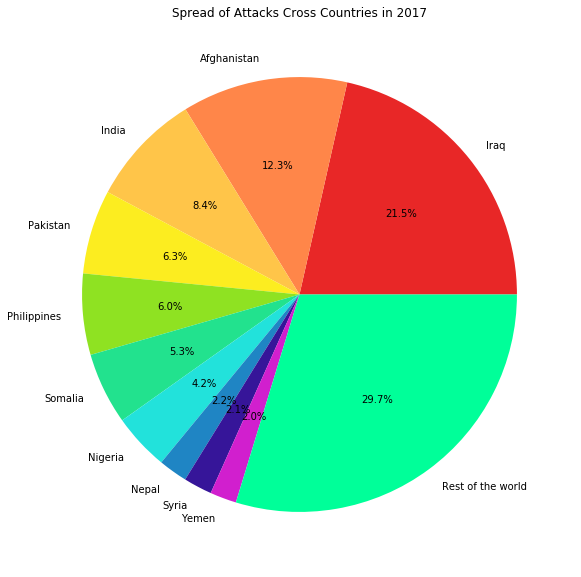

In [15]:
plt.subplots(figsize=(10,10))
d = pd.DataFrame(data[data['Year']==2017]['Country'].value_counts(sort=True)[:10])
d.reset_index(inplace=True)
d.columns=['Country','Attack #']
append = ['Rest of the world',sum(data[data['Year']==2016]['Country'].value_counts(sort=True)) - sum(data[data['Year']==2016]['Country'].value_counts(sort=True)[:10])]
d.loc[len(d)]= append
color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce","#00ff99","#fa97fc"]
plt.title("Spread of Attacks Cross Countries in 2017")
plt.pie(d['Attack #'],labels=d['Country'],colors= color_set,autopct='%.1f%%')
plt.show()

# Are Attacks in 2017 Seasonal? 


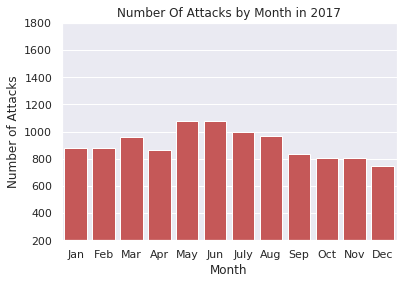

In [16]:
sns.set_style('darkgrid')
sns.set_context("notebook")
ax = sns.categorical.countplot(subset2017.Month, color='#D74646')
ax.set(xlabel='Month', ylabel='Number of Attacks',ylim=(200,1800))
ax.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
plt.title('Number Of Attacks by Month in 2017')
plt.show()

#Attacks by Year

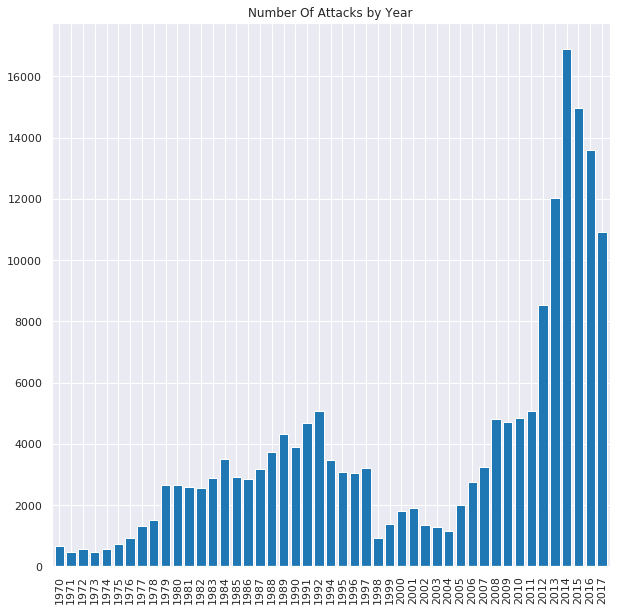

In [17]:
barplot = pd.value_counts(data['Year'])\
.sort_index()\
.plot\
.bar(width=0.8, figsize=(10, 10))
plt.title('Number Of Attacks by Year')
plt.show()

#2017 Attacks Motive (US)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


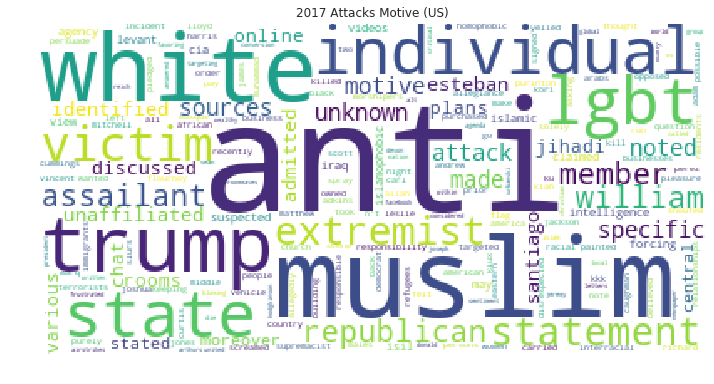

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
df_country = subset2017[subset2017['Country'] == 'United States']
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.axis('off')
plt.title('2017 Attacks Motive (US)')
plt.show()

#2011-2016 Attacks Motive (US)

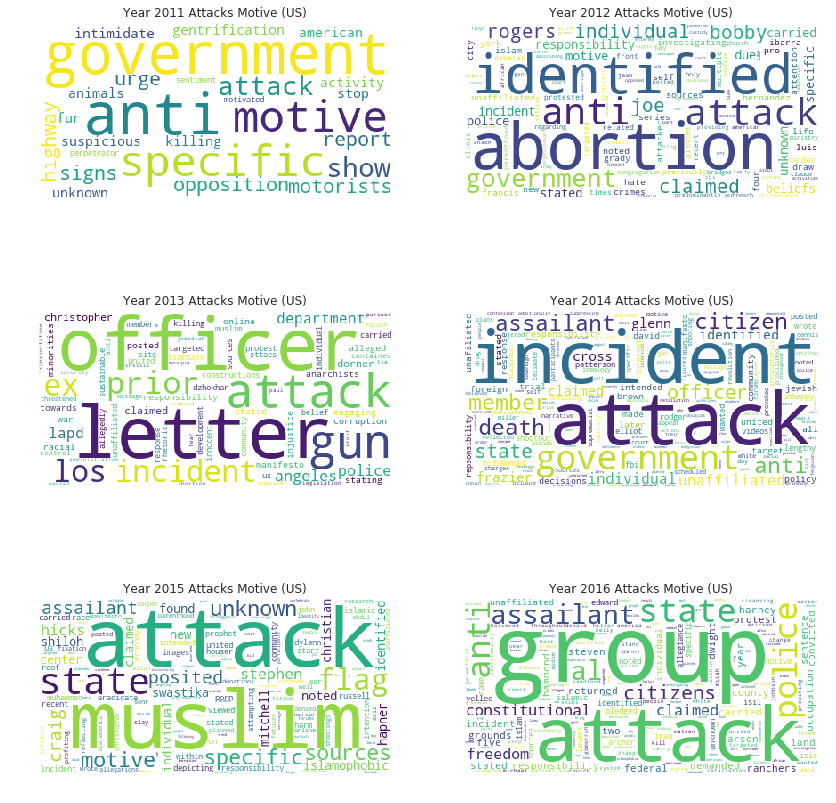

In [19]:
years = [2011,2012,2013,2014,2015,2016]
df_country = data[data['Country'] == 'United States']
plt.figure(figsize=(14,15))
gs = gridspec.GridSpec(3, 2)
for i, cn in enumerate(years):
    ax = plt.subplot(gs[i])
    df_time = df_country[df_country['Year'] == cn]
    country_motive = df_time['Motive'].str.lower().str.cat(sep=' ')
    words=nltk.tokenize.word_tokenize(country_motive)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
    ax.imshow(wordcloud)
    ax.set_title('Year ' + str(cn) + ' Attacks Motive (US)' )
    ax.axis('off')

#Attacks by Attack Types

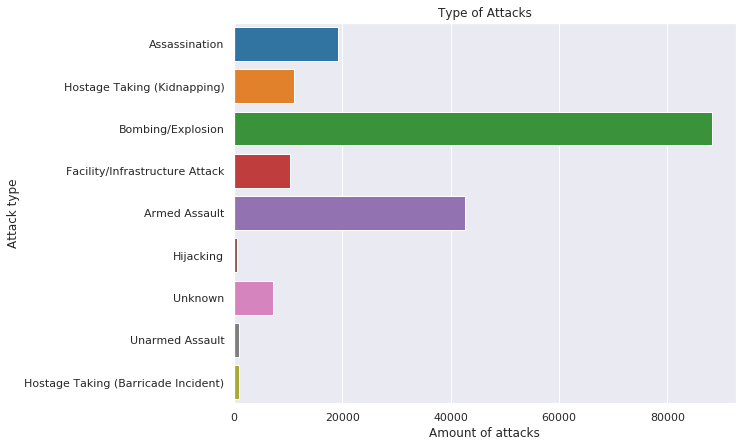

In [20]:
plt.figure(figsize=(9,7))
ax = sns.countplot(y="AttackType", data=data)
ax.set_xlabel("Amount of attacks")
ax.set_ylabel("Attack type")
plt.title('Type of Attacks')
plt.show()

# Attacks by Continent

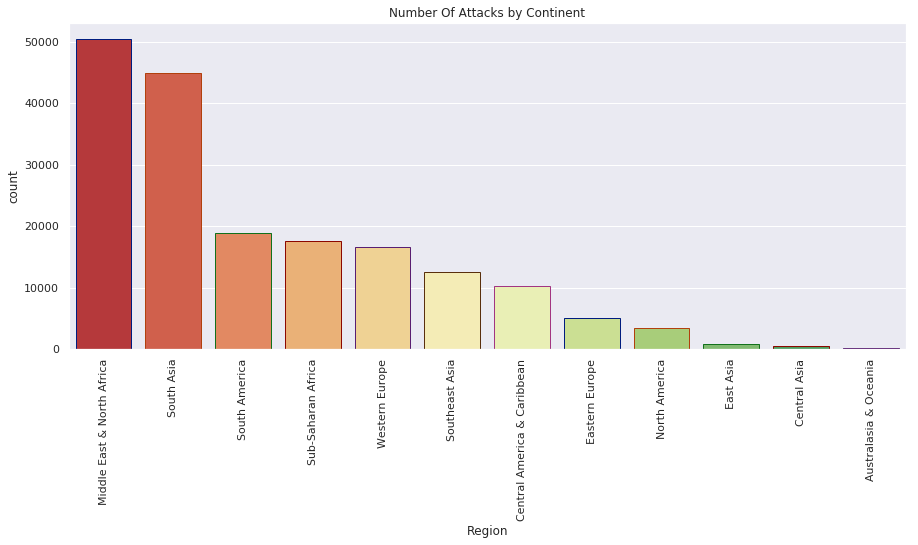

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=data,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=data['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Attacks by Continent')
plt.show()

# Attacks by Countries in 2017

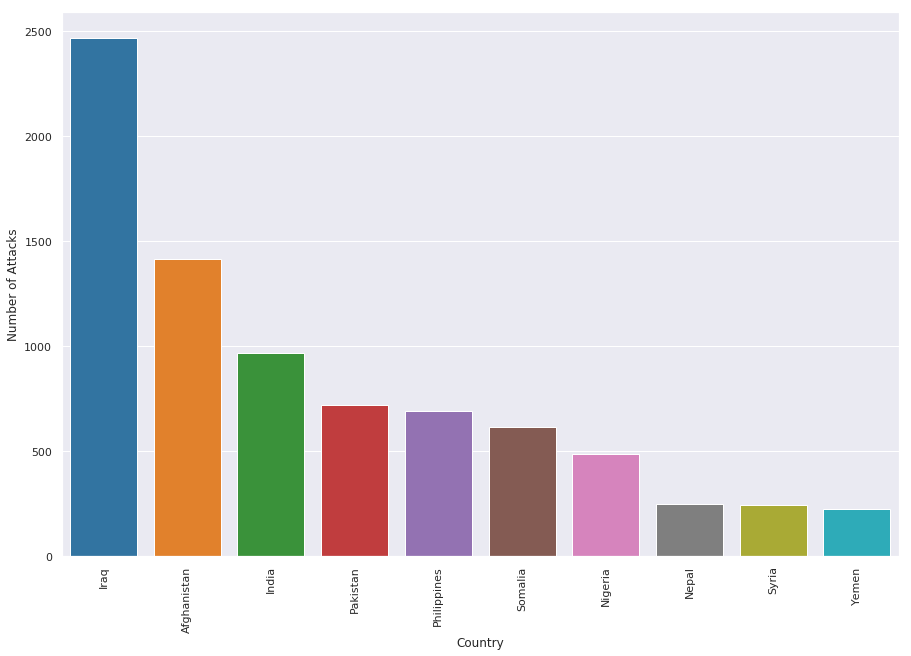

In [22]:
import copy
plt.subplots(figsize=(15,10))
d = data[data['Year']==2017]
countries = pd.DataFrame(d['Country'].value_counts()[:10])
countries.reset_index(inplace=True)
countries.columns= ['Country','Number of Attacks']
#https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
population = pd.Series([37202572,34656032,1324171354, 14317996, 79512426, 27584213, 20672987, 18430453, 103320222, 193203476])
countries2 = copy.deepcopy(countries)
countries['Number of Attacks'] = countries['Number of Attacks']/population*1000000
p1 = sns.barplot(countries2['Country'],countries2['Number of Attacks'],data= countries2)
p1.set_xticklabels(countries2['Country'],rotation=90)
plt.show(p1)

# Attacks by Target Type

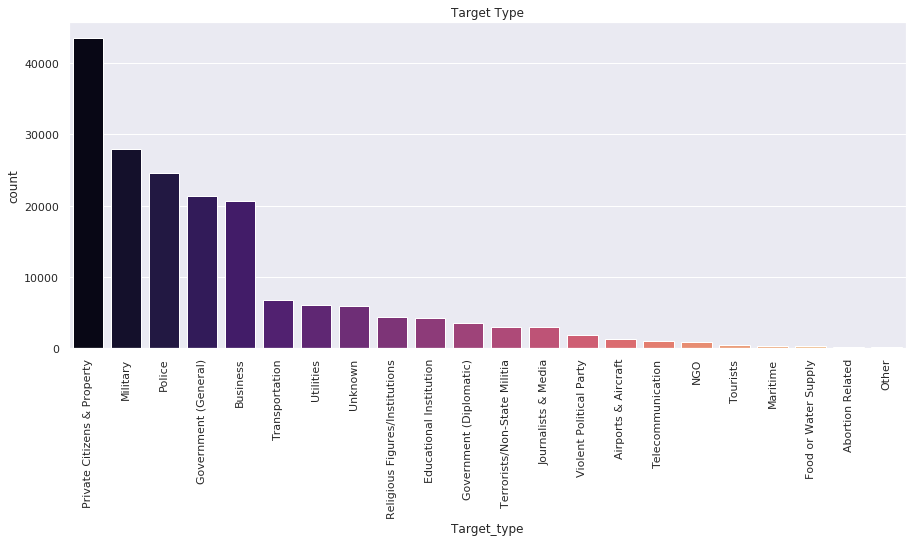

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot(data['Target_type'],palette='magma',order=data['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target Type')
plt.show()

# Attacks By Year


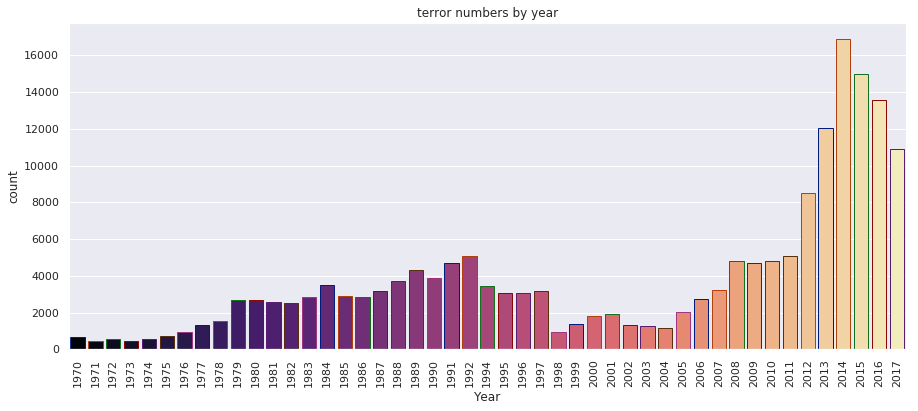

In [24]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='magma',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('terror numbers by year')
plt.show()

# Attack Nature Classification

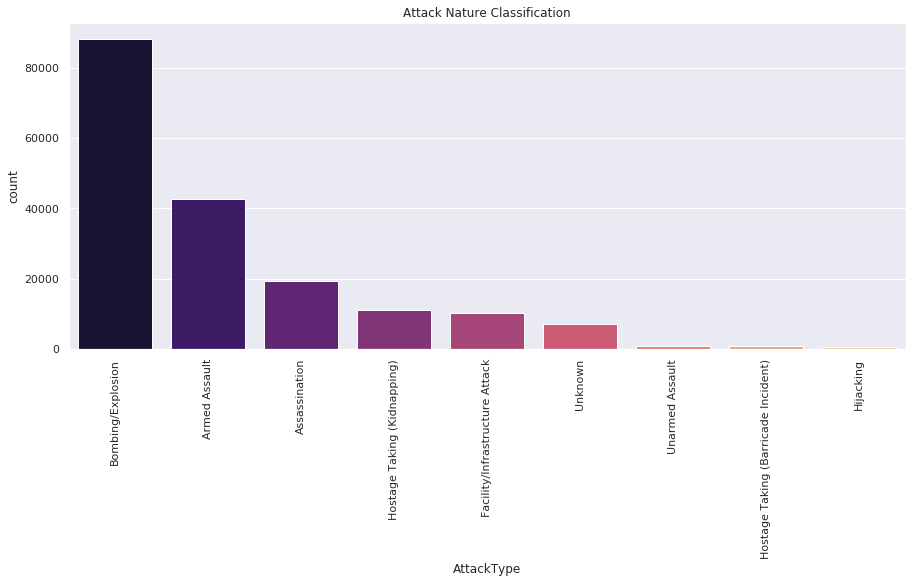

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=data,palette='magma',order=data['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attack Nature Classification')
plt.show()

# Attacks By Terror Groups


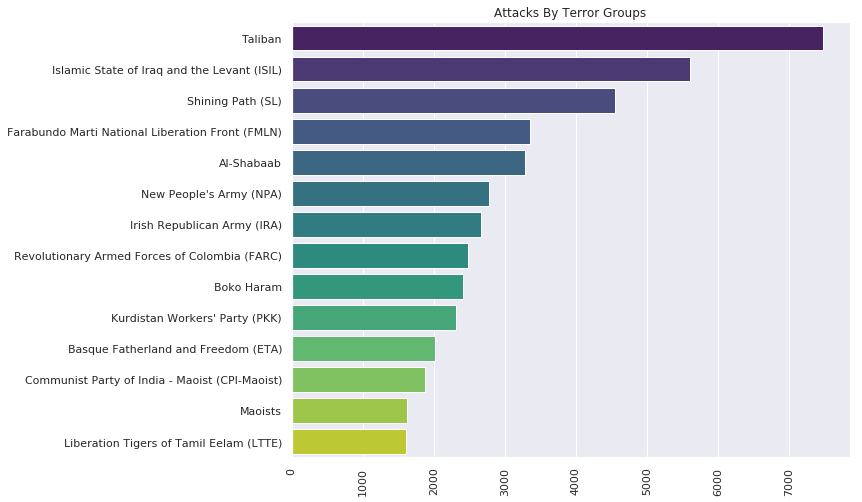

In [26]:
sns.barplot(data['Group'].value_counts()[1:15].values,data['Group'].value_counts()[1:15].index,palette=('viridis'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Attacks By Terror Groups')
plt.show()

#Attacks by Taliban / Quarter : 2014-2017

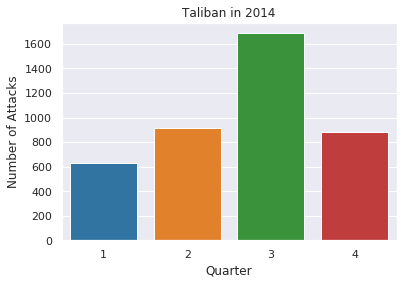

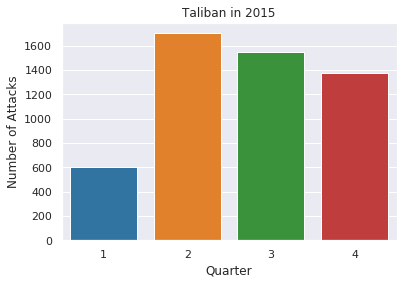

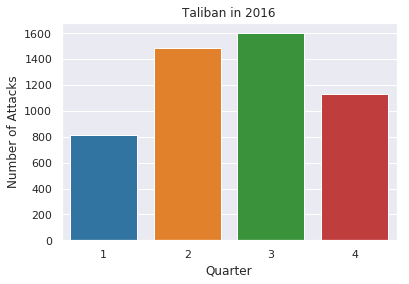

In [27]:
def attacks_per_month(data,Group,Year):
    data2 = data[(data['Group']==Group) & (data['Year']==Year)]
    attacks_month = data2.groupby(['Month'])['Killed'].sum()
    quarters = pd.Series([sum(attacks_month.iloc[0:3]),sum(attacks_month.iloc[3:6]),sum(attacks_month.iloc[6:9]),sum(attacks_month.iloc[9:])],index=[1,2,3,4])
    plot2 = sns.barplot(quarters.index ,quarters)
    plot2.set_xlabel('Quarter')
    plot2.set_ylabel('Number of Attacks')
    plot2.set_title(Group + " in "+str(Year))
    plt.show()
for i in range(2014,2017):
    attacks_per_month(data,"Taliban",i)

# Attacks by Terror Groups/Time Trend

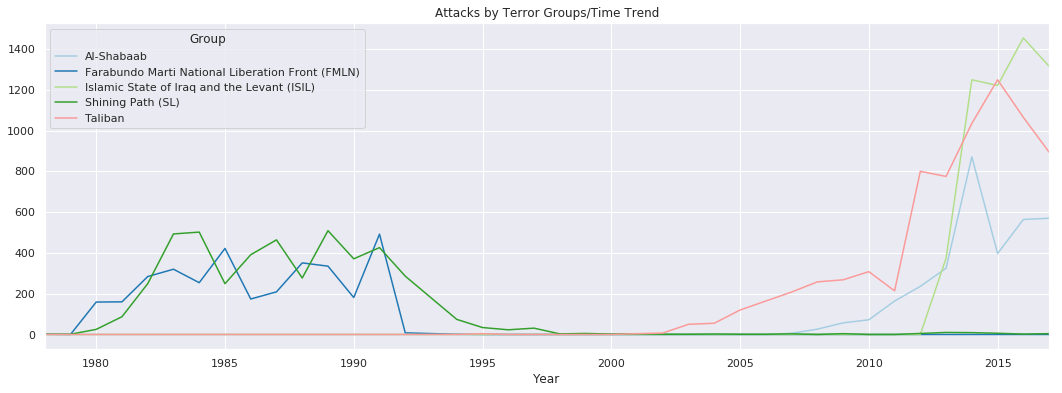

In [28]:
topgroups=data[data['Group'].isin(data['Group'].value_counts()[1:6].index)]
pd.crosstab(topgroups.Year,topgroups.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Attacks by Terror Groups/Time Trend')
plt.show()

# Iraq: Active Groups & Attack Types


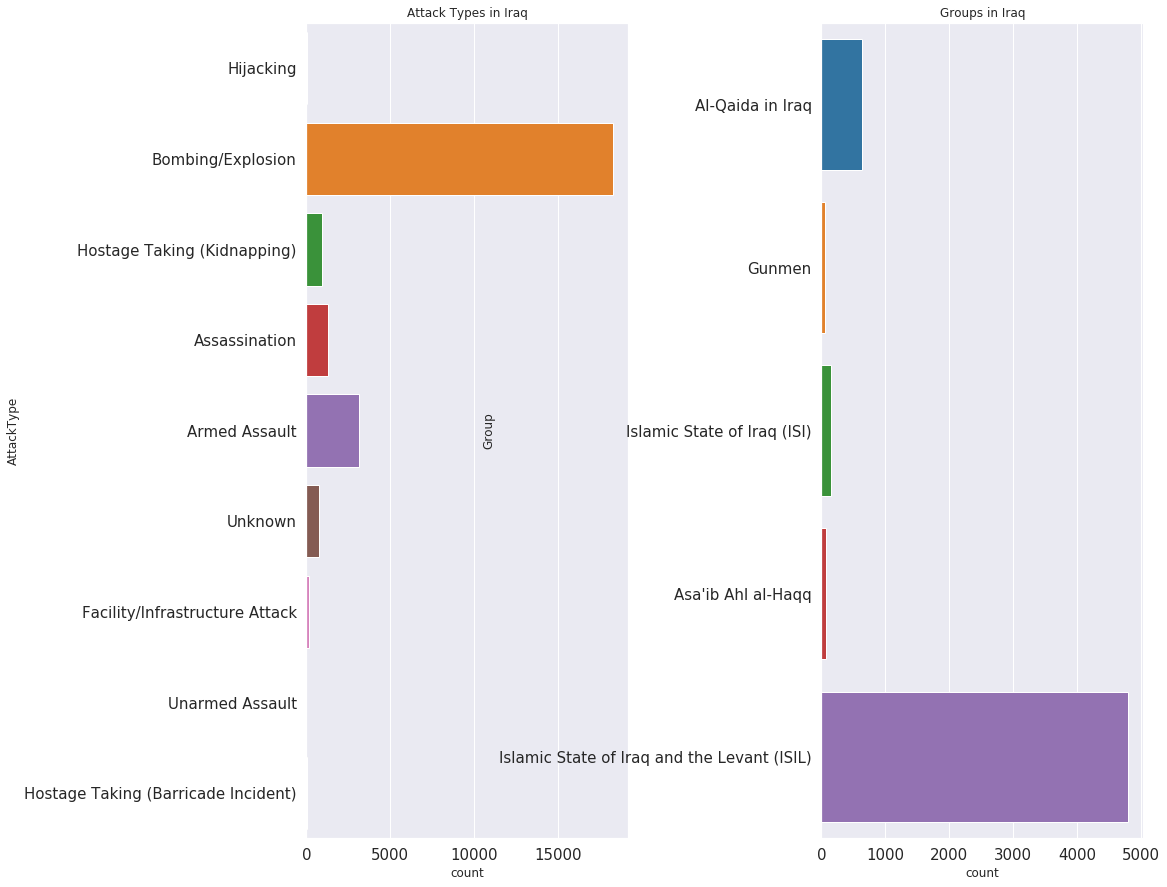

In [29]:
f,ax=plt.subplots(1,2,figsize=(15,15))
iraq_attacks=data[data['Country']=='Iraq']
iraq_groups=iraq_attacks['Group'].value_counts()[1:6].index
iraq_groups=iraq_attacks[iraq_attacks['Group'].isin(iraq_groups)]
sns.countplot(y='Group',data=iraq_groups,ax=ax[1])
sns.countplot(y='AttackType',data=iraq_attacks,ax=ax[0])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[1].set_title('Groups in Iraq')
ax[0].set_title('Attack Types in Iraq')
ax[1].tick_params(labelsize=15)
ax[0].tick_params(labelsize=15)
plt.show()

# Italy: Active Groups & Attack Types

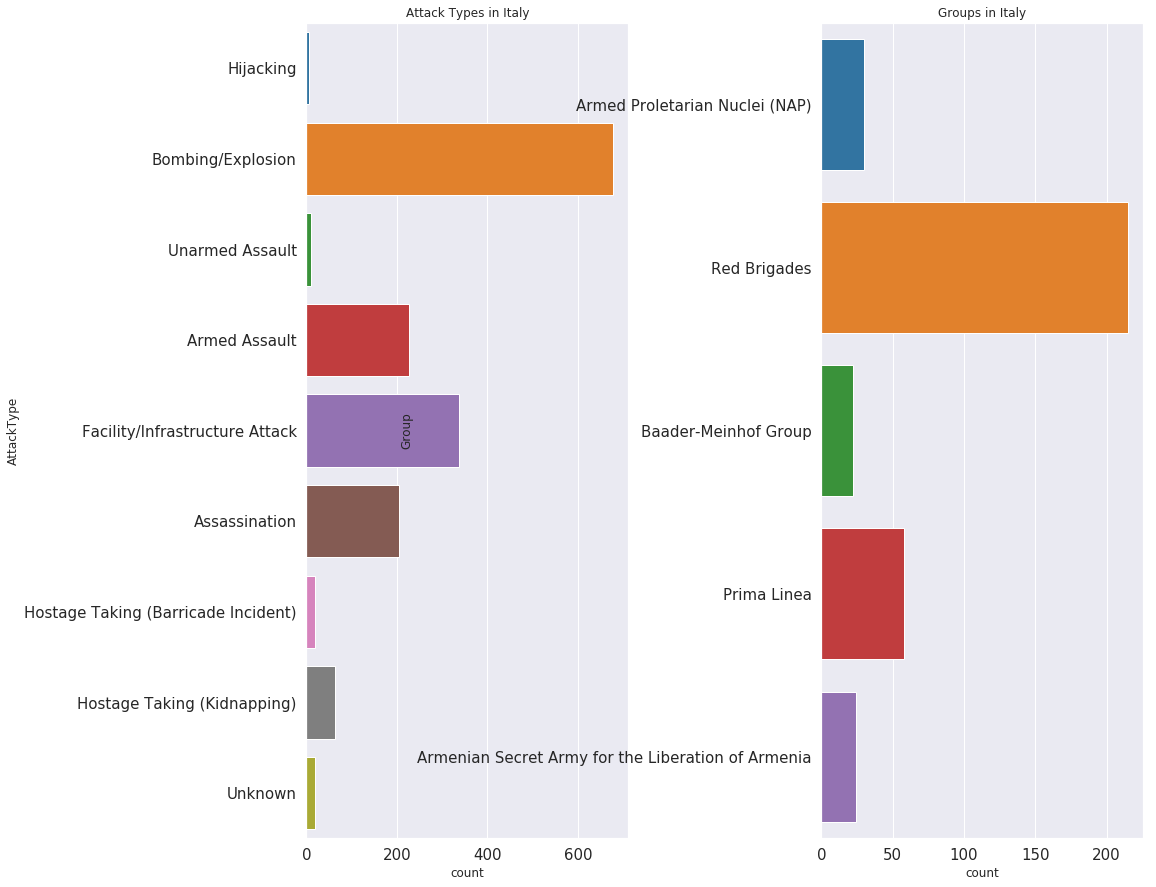

In [30]:
f,ax=plt.subplots(1,2,figsize=(15,15))
italy_attacks=data[data['Country']=='Italy']
italy_groups=italy_attacks['Group'].value_counts()[1:6].index
italy_groups=italy_attacks[italy_attacks['Group'].isin(italy_groups)]
sns.countplot(y='Group',data=italy_groups,ax=ax[1])
sns.countplot(y='AttackType',data=italy_attacks,ax=ax[0])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[1].set_title('Groups in Italy')
ax[0].set_title('Attack Types in Italy')
ax[1].tick_params(labelsize=15)
ax[0].tick_params(labelsize=15)
plt.show()

# USA: Active Groups & Attack Types

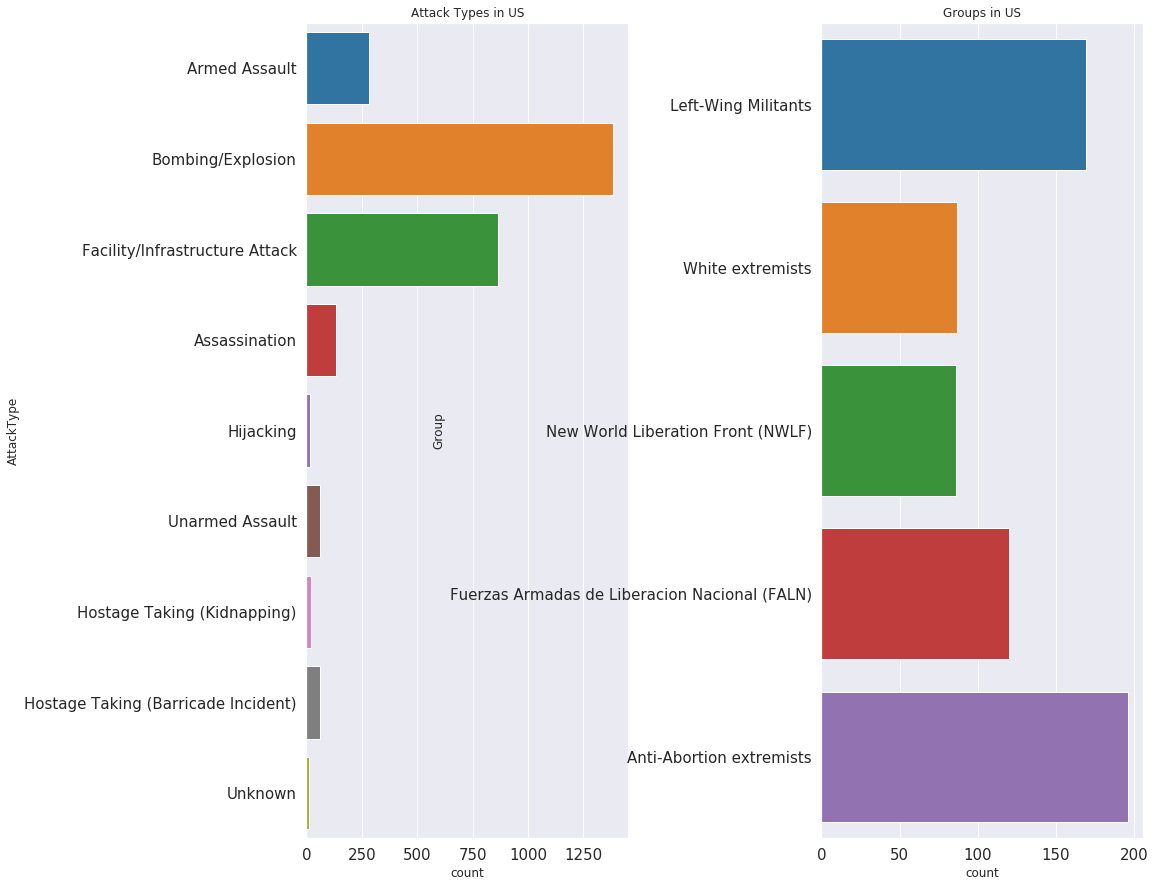

In [31]:
f,ax=plt.subplots(1,2,figsize=(15,15))
USA_attacks=data[data['Country']=='United States']
USA_groups=USA_attacks['Group'].value_counts()[1:6].index
USA_groups=USA_attacks[USA_attacks['Group'].isin(USA_groups)]
sns.countplot(y='Group',data=USA_groups,ax=ax[1])
sns.countplot(y='AttackType',data=USA_attacks,ax=ax[0])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[1].set_title('Groups in US')
ax[0].set_title('Attack Types in US')
ax[1].tick_params(labelsize=15)
ax[0].tick_params(labelsize=15)
plt.show()

#Date Exploration

In [32]:
list(data['Date'].sort_values().unique())[0]

numpy.datetime64('1969-11-30T00:00:00.000000000')

In [33]:
list(data['Date'].sort_values().unique())[-1]

numpy.datetime64('2017-12-31T00:00:00.000000000')

In [34]:
list(data.columns)

['Year',
 'Month',
 'Day',
 'Country',
 'Region',
 'city',
 'latitude',
 'longitude',
 'AttackType',
 'Killed',
 'Wounded',
 'Target',
 'Summary',
 'Group',
 'Target_type',
 'Weapon_type',
 'Motive',
 'Date']

In [0]:
data_ts = data.set_index('Date')

In [36]:
data_ts.resample('Y').count().head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
Date,,,,,,,,,,,,,,,,,
1969-12-31,4,4,4,4,4,4,4,4,4,2,2,4,0,4,4,4,0
1970-12-31,647,647,647,647,647,647,639,639,647,607,597,625,386,647,647,647,231
1971-12-31,473,473,473,473,473,473,464,464,473,409,328,468,139,473,473,473,113
1972-12-31,567,567,567,567,567,567,550,550,567,523,240,565,116,567,567,567,40
1973-12-31,475,475,475,475,475,475,468,468,475,426,246,460,28,475,475,475,25


In [37]:
d = {'Country': 205, 'Region': 12, 'city':36675, 'AttackType': 9, 'Killed':1, 'Wounded':1, 'Target':86007,
            'Summary':112493, 'Group':3537, 'Target_type':22, 'Weapon_type':12, 'Motive':14491}
col_counts= pd.DataFrame(list(d.items()),columns=["col",'count'])
col_counts.sort_values('count').reset_index(drop=True)

,col,count
0,Killed,1
1,Wounded,1
2,AttackType,9
3,Region,12
4,Weapon_type,12
5,Target_type,22
6,Country,205
7,Group,3537
8,Motive,14491
9,city,36675


# Time Series of Attack Types in US

In [0]:
us_data=data_ts[data_ts.Country=="United States"]

In [39]:
us_data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
Date,,,,,,,,,,,,,,,,,
1970-01-01,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
1970-01-02,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN
1970-01-02,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
1970-01-03,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft
1970-01-01,1970,1,1,United States,North America,Baraboo,43.468500,-89.744299,Bombing/Explosion,0.0,0.0,Badger Army ammo depot.,NaN,"Weather Underground, Weathermen",Military,Explosives,NaN


In [40]:
us_attacktype=pd.crosstab(us_data.index,us_data.AttackType)
us_attacktype.index.names=['Date']
us_attacktype.head()

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Date,,,,,,,,,
1970-01-01,1,0,1,0,0,0,0,0,0
1970-01-02,0,0,1,1,0,0,0,0,0
1970-01-03,0,0,0,1,0,0,0,0,0
1970-01-06,0,0,0,1,0,0,0,0,0
1970-01-09,0,0,0,2,0,0,0,0,0


In [41]:
us_attacktype.columns

Index(['Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown'], dtype='object', name='AttackType')

In [42]:
monthly_us_attacktype=us_attacktype.resample("M").sum()
monthly_us_attacktype=monthly_us_attacktype.drop('Unknown', axis=1)
monthly_us_attacktype['Sum']=monthly_us_attacktype.sum(axis=1)
monthly_us_attacktype.head()

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Sum
Date,,,,,,,,,
1970-01-31,3,0,12,11,0,0,0,0,26
1970-02-28,2,0,30,18,0,0,0,0,50
1970-03-31,0,2,36,15,1,0,0,0,54
1970-04-30,2,1,44,24,0,0,0,0,71
1970-05-31,3,0,26,31,0,0,0,1,61


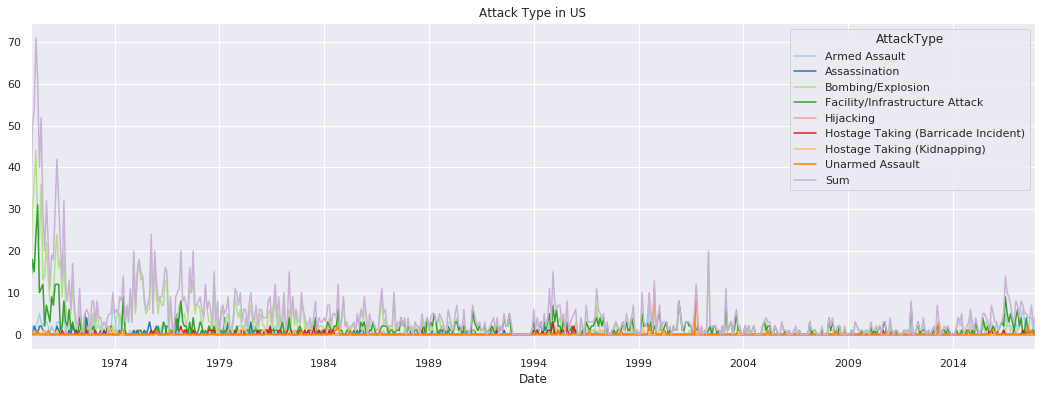

In [43]:
monthly_us_attacktype.plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Attack Type in US')
plt.show()

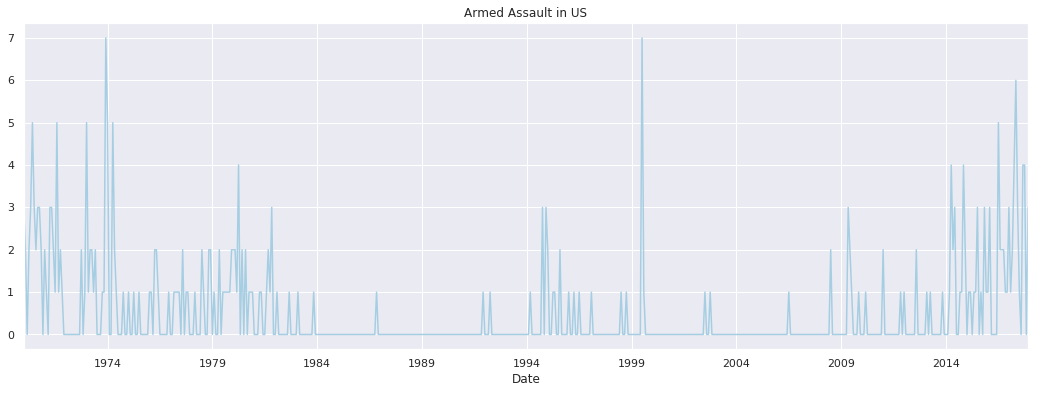

In [44]:
monthly_us_attacktype["Armed Assault"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Armed Assault in US')
plt.show()

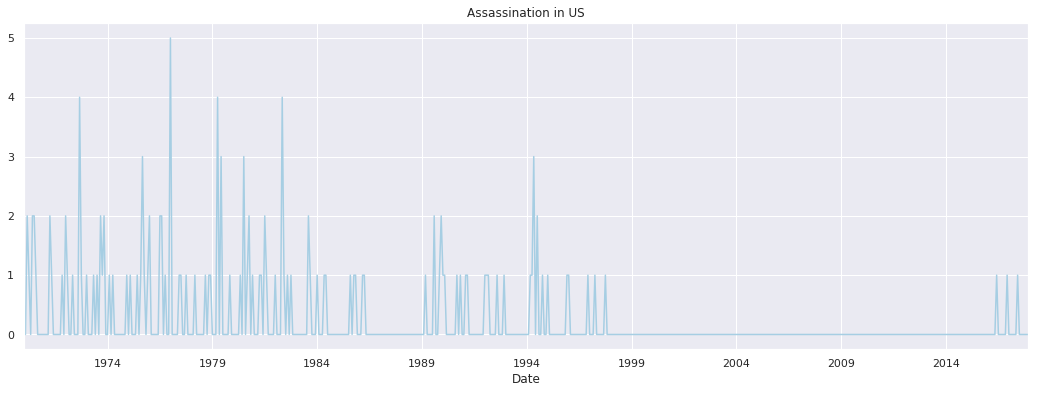

In [45]:
monthly_us_attacktype["Assassination"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Assassination in US')
plt.show()

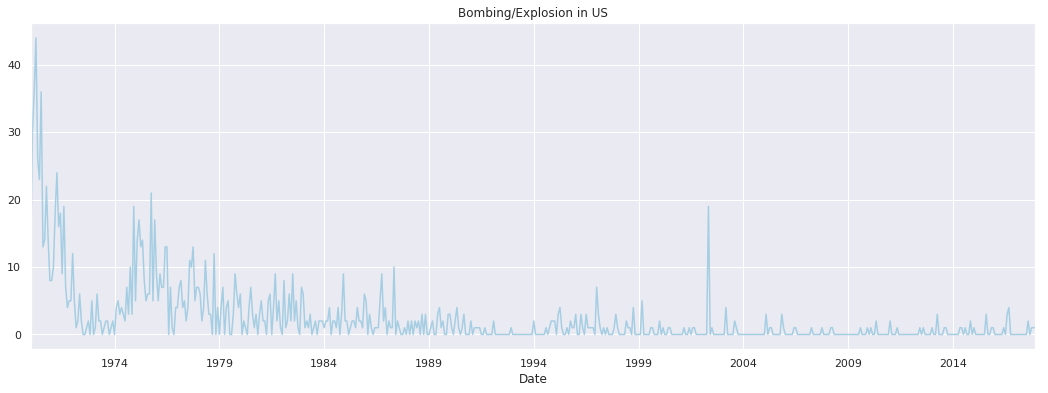

In [46]:
monthly_us_attacktype["Bombing/Explosion"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Bombing/Explosion in US')
plt.show()

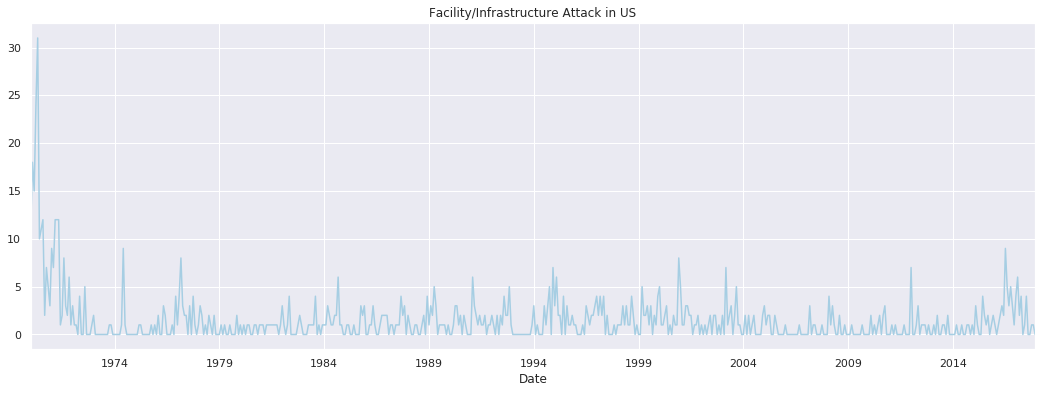

In [47]:
monthly_us_attacktype["Facility/Infrastructure Attack"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Facility/Infrastructure Attack in US')
plt.show()

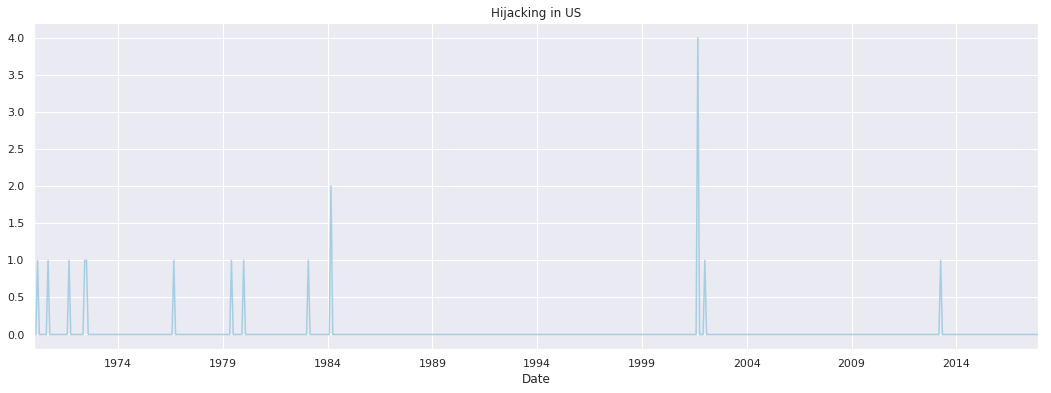

In [48]:
monthly_us_attacktype["Hijacking"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Hijacking in US')
plt.show()

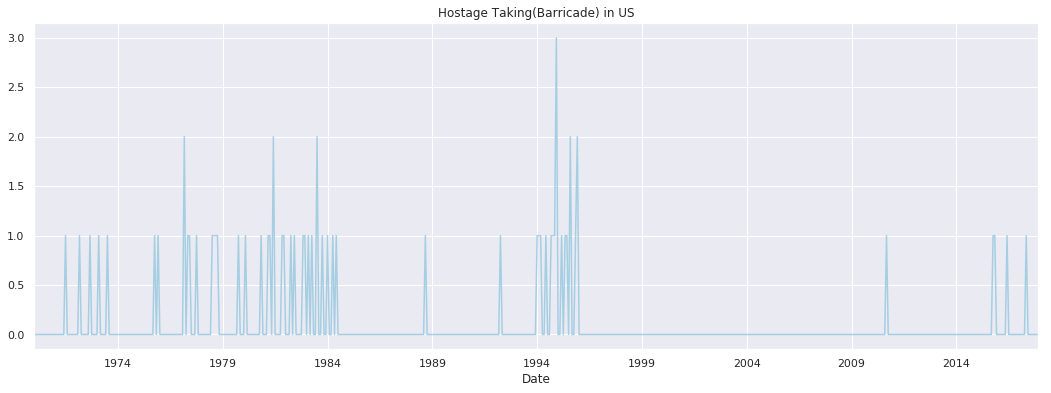

In [49]:
monthly_us_attacktype["Hostage Taking (Barricade Incident)"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Hostage Taking(Barricade) in US')
plt.show()

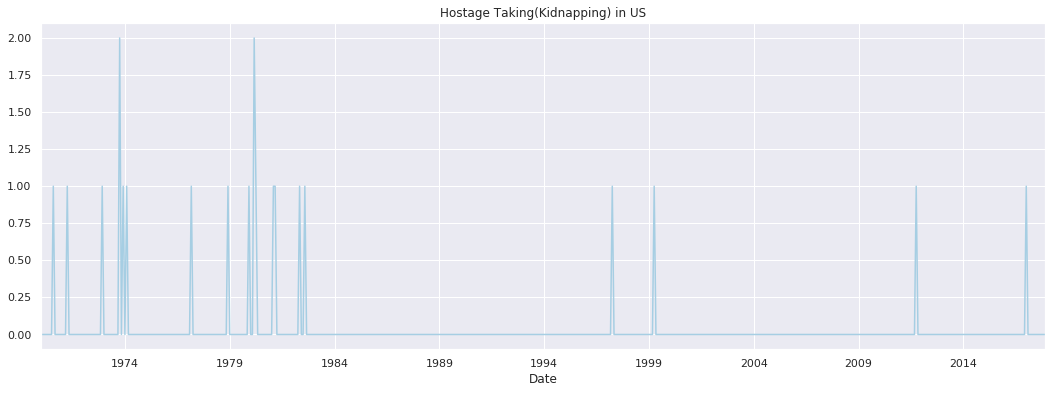

In [50]:
monthly_us_attacktype["Hostage Taking (Kidnapping)"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Hostage Taking(Kidnapping) in US')
plt.show()

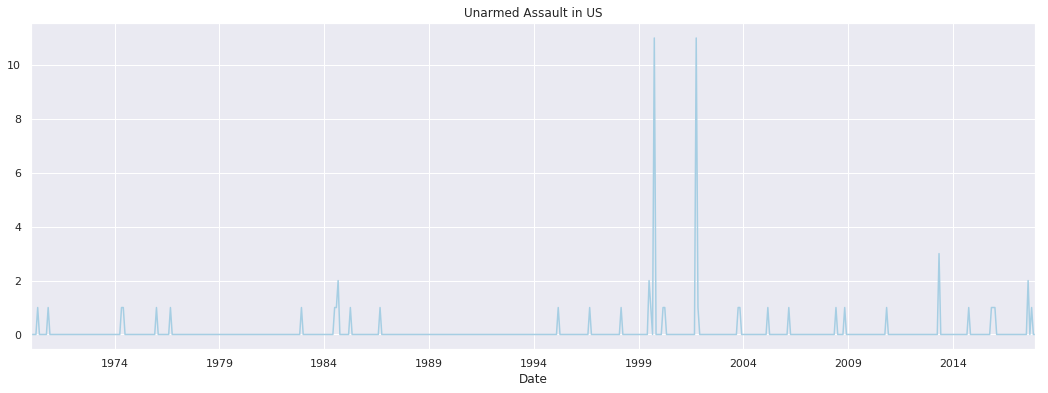

In [51]:
monthly_us_attacktype["Unarmed Assault"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Unarmed Assault in US')
plt.show()

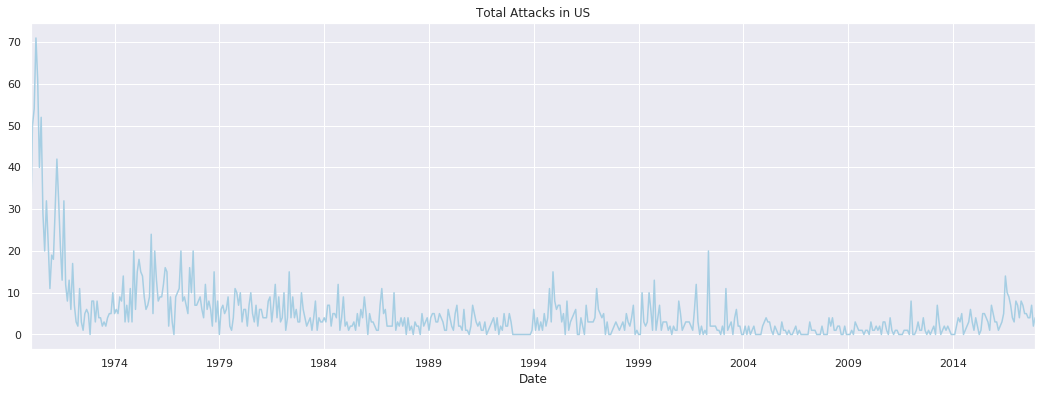

In [52]:
monthly_us_attacktype["Sum"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in US')
plt.show()

In [0]:
us_attacks=monthly_us_attacktype["Sum"]

In [0]:
us_attacks=us_attacks[us_attacks.index > '1993-12-31']

In [0]:
us_attacks.to_csv('us_attacks.csv')

In [0]:
us_bombings_facility = monthly_us_attacktype[["Bombing/Explosion","Facility/Infrastructure Attack"]]

In [57]:
us_bombings_facility.head()

AttackType,Bombing/Explosion,Facility/Infrastructure Attack
Date,,
1970-01-31,12,11
1970-02-28,30,18
1970-03-31,36,15
1970-04-30,44,24
1970-05-31,26,31


In [0]:
us_bombings_facility.to_csv('us_bombings_facility.csv')

#Attacks by World Regions

In [93]:
world_attacks=pd.crosstab(data_ts.index,data_ts.Region)

world_attacks.index.names=['Date']
world_attacks.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Date,,,,,,,,,,,,
1969-11-30,0,0,0,0,0,0,1,0,0,0,0,0
1969-12-31,0,0,0,1,0,0,0,0,0,1,0,1
1970-01-01,0,0,0,0,0,0,2,0,0,0,0,0
1970-01-02,0,0,0,0,0,0,2,1,0,0,0,0
1970-01-03,0,0,0,0,0,0,1,0,0,0,0,0


In [94]:
monthly_world_attacks=world_attacks.resample("M").sum()
monthly_world_attacks['Sum']=monthly_world_attacks.sum(axis=1)
monthly_world_attacks.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe,Sum
Date,,,,,,,,,,,,,
1969-11-30,0,0,0,0,0,0,1,0,0,0,0,0,1
1969-12-31,0,0,0,1,0,0,0,0,0,1,0,1,3
1970-01-31,0,1,0,0,2,0,26,3,0,2,1,1,36
1970-02-28,0,0,0,0,0,1,50,0,0,1,0,4,56
1970-03-31,0,3,0,1,0,2,54,3,0,1,2,3,69


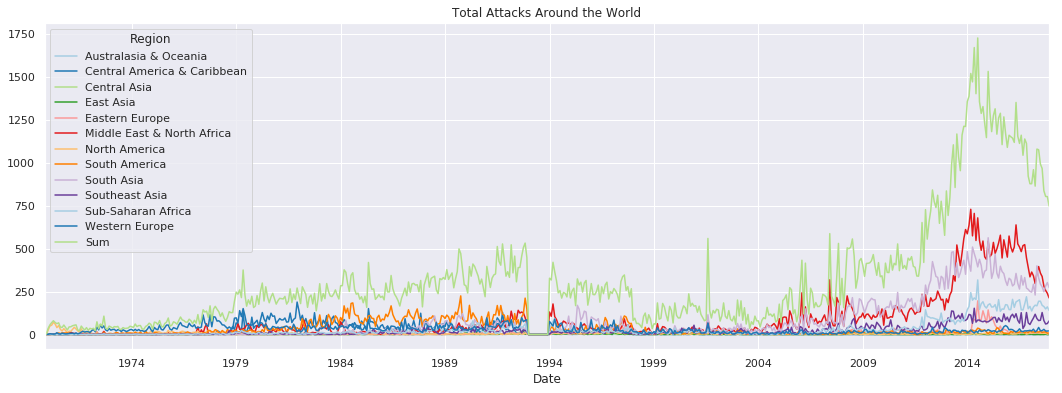

In [61]:
monthly_world_attacks.plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks Around the World')
plt.show()

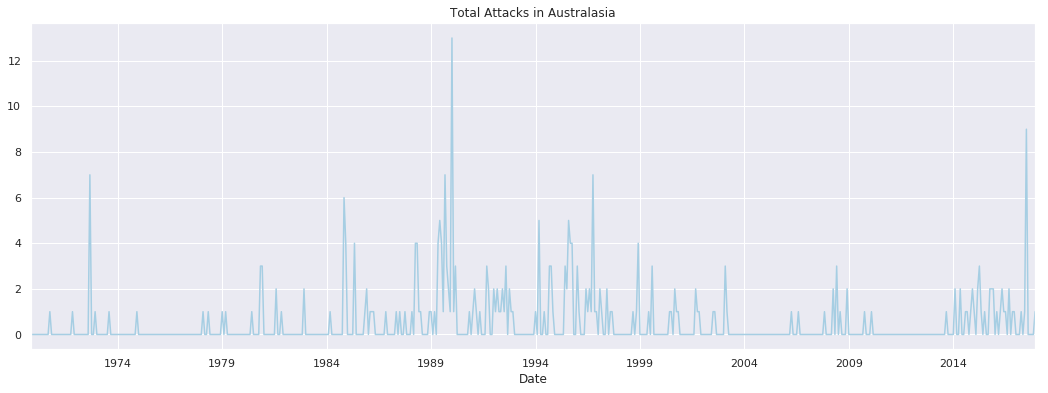

In [62]:
monthly_world_attacks["Australasia & Oceania"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in Australasia')
plt.show()

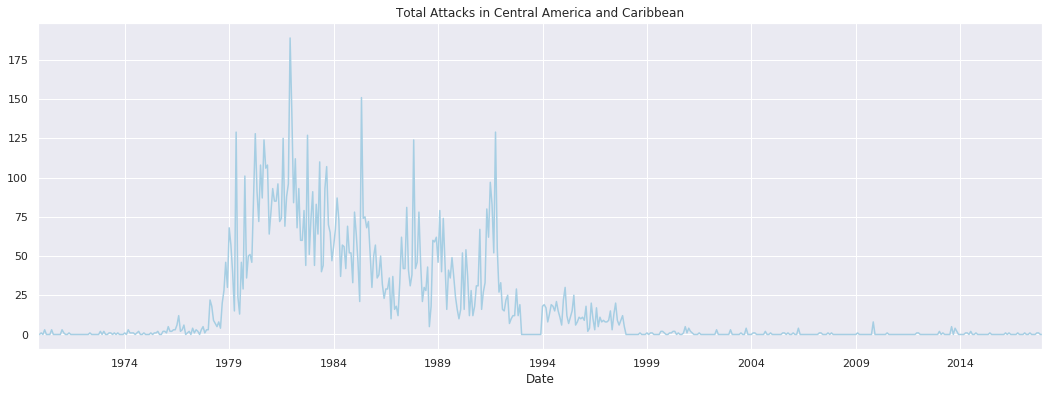

In [63]:
monthly_world_attacks["Central America & Caribbean"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in Central America and Caribbean')
plt.show()

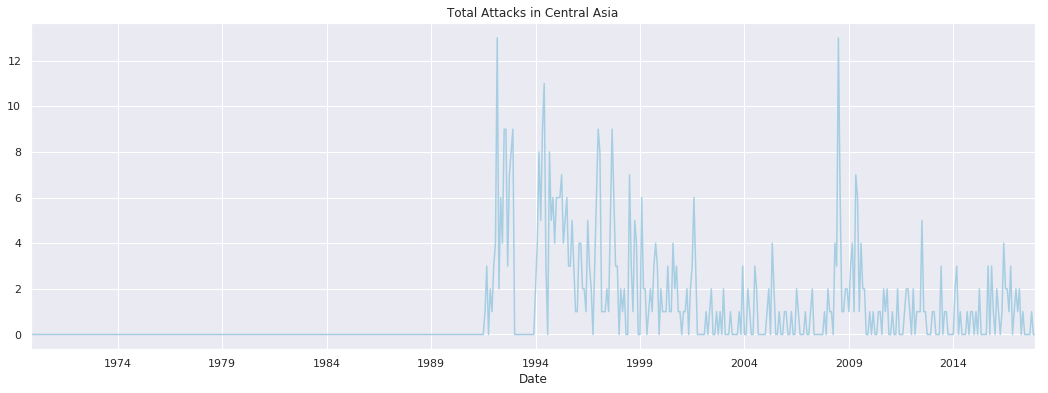

In [64]:
monthly_world_attacks["Central Asia"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in Central Asia')
plt.show()

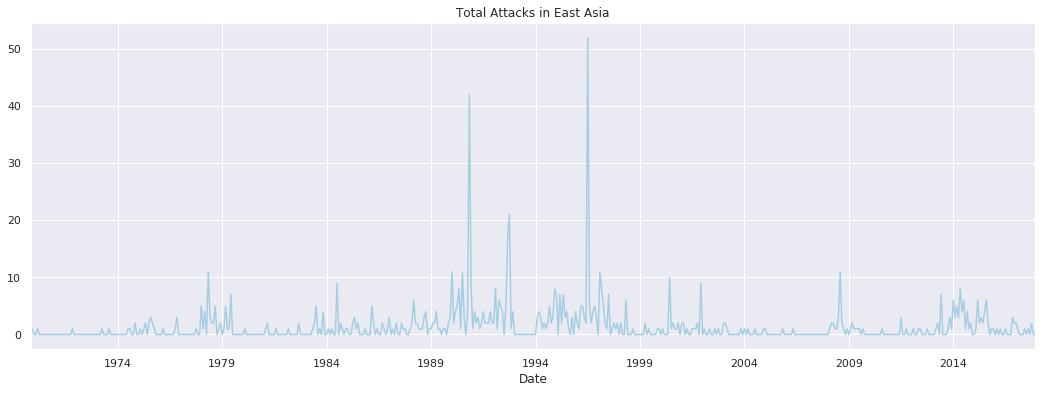

In [65]:
monthly_world_attacks["East Asia"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in East Asia')
plt.show()

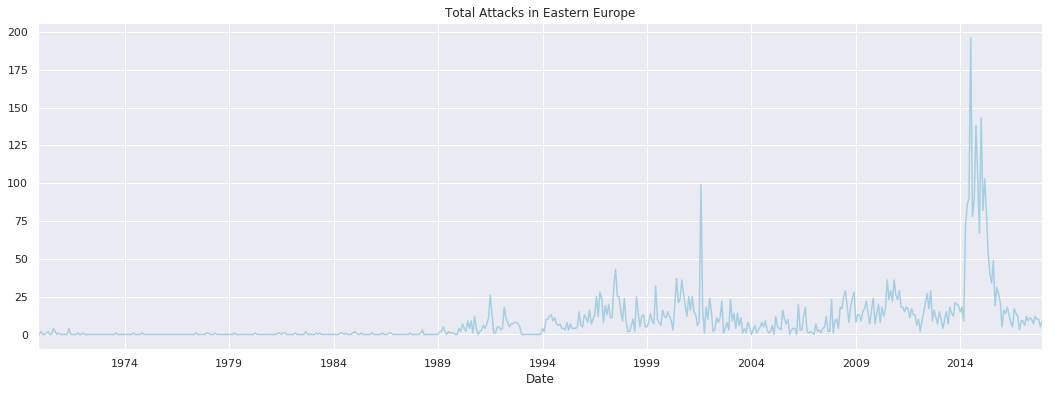

In [66]:
monthly_world_attacks["Eastern Europe"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in Eastern Europe')
plt.show()

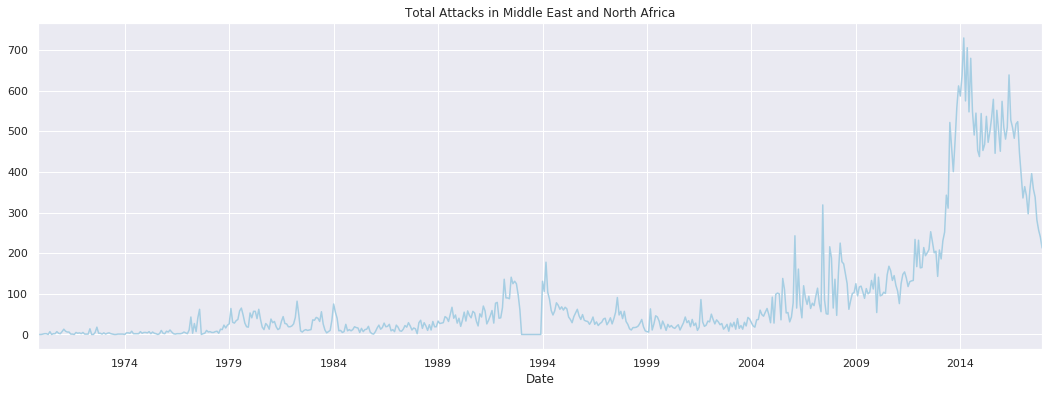

In [67]:
monthly_world_attacks["Middle East & North Africa"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in Middle East and North Africa')
plt.show()

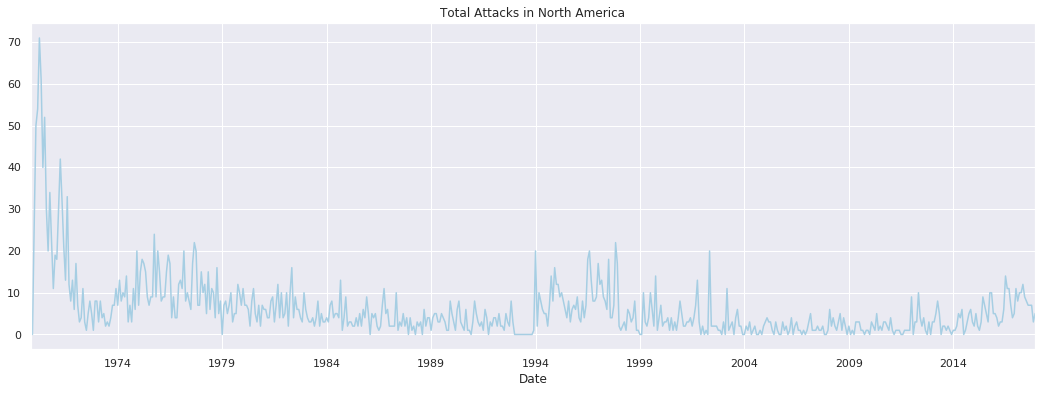

In [68]:
monthly_world_attacks["North America"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in North America')
plt.show()

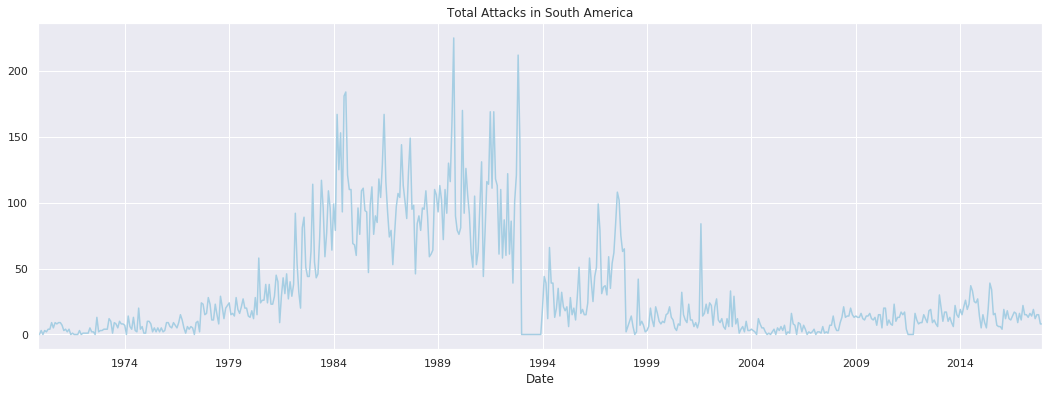

In [69]:
monthly_world_attacks["South America"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in South America')
plt.show()

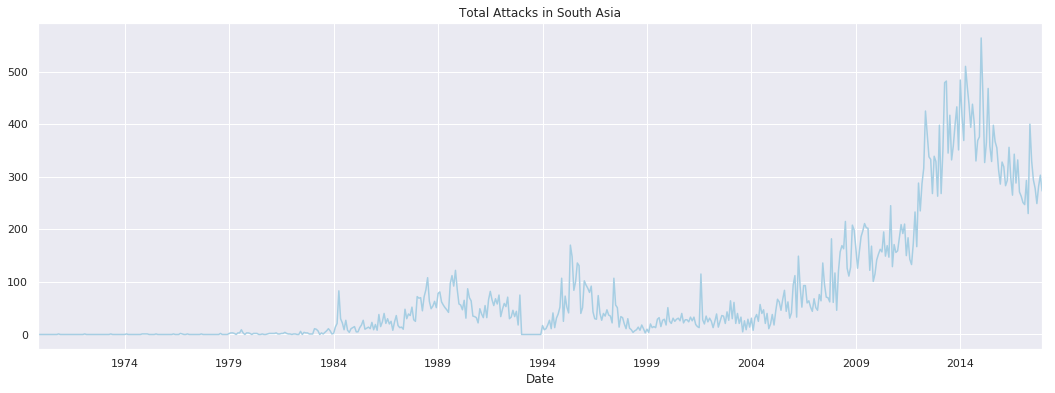

In [70]:
monthly_world_attacks["South Asia"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in South Asia')
plt.show()

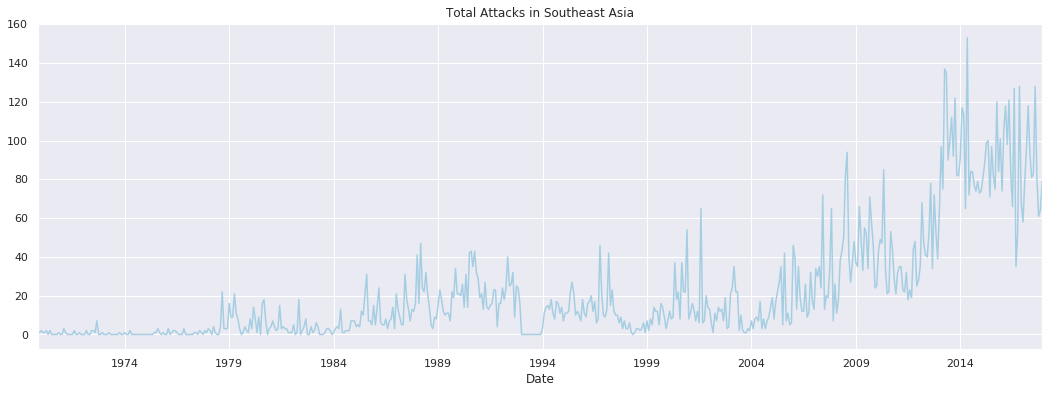

In [71]:
monthly_world_attacks["Southeast Asia"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in Southeast Asia')
plt.show()

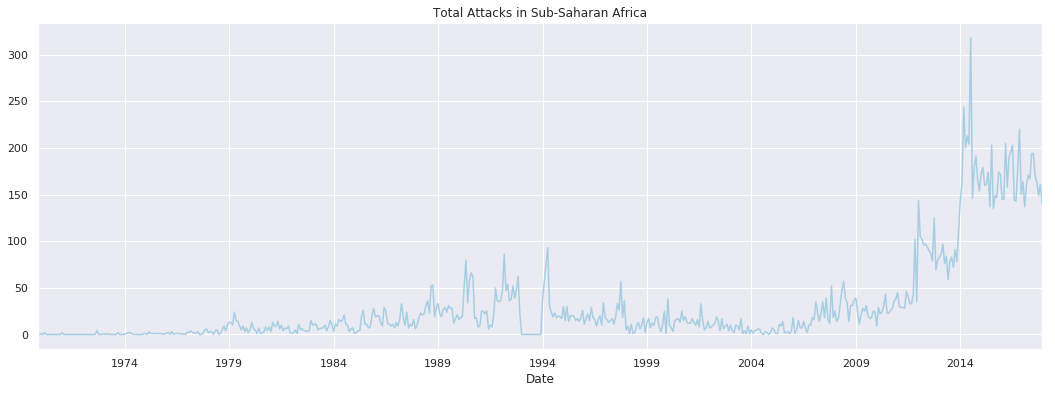

In [72]:
monthly_world_attacks["Sub-Saharan Africa"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in Sub-Saharan Africa')
plt.show()

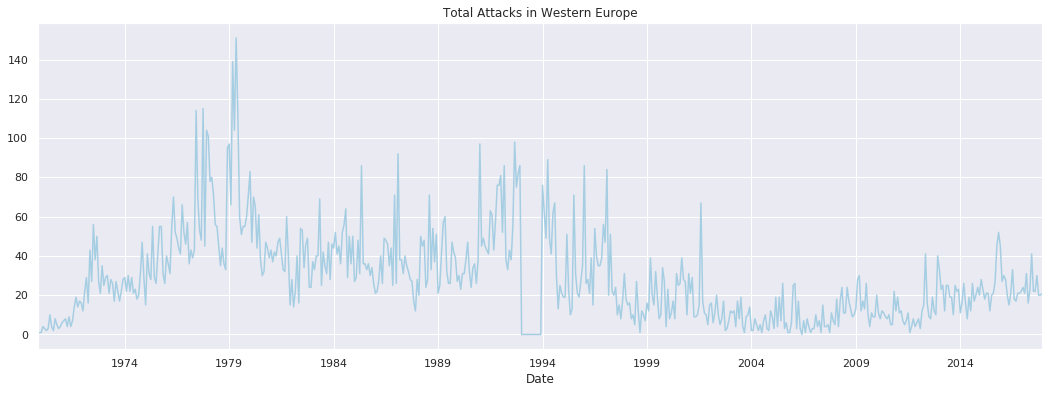

In [73]:
monthly_world_attacks["Western Europe"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in Western Europe')
plt.show()

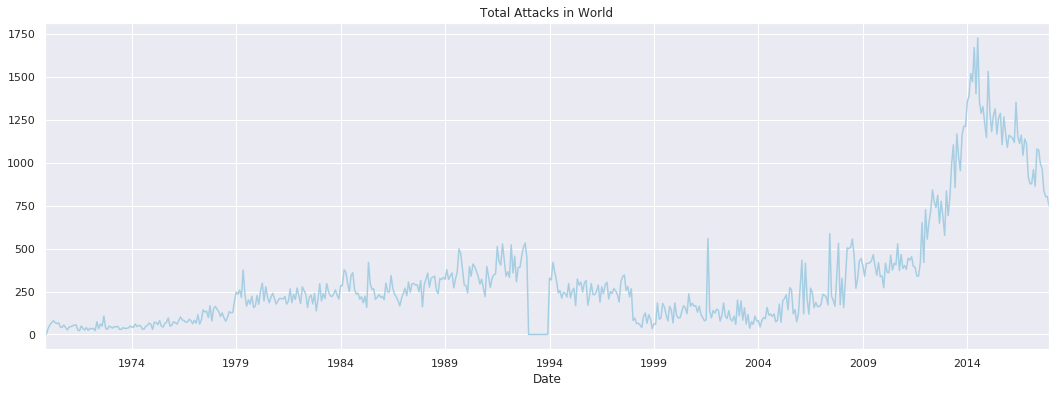

In [74]:
monthly_world_attacks["Sum"].plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in World')
plt.show()

In [75]:
monthly_world_attacks['Sum'].head()

Date
1969-11-30     1
1969-12-31     3
1970-01-31    36
1970-02-28    56
1970-03-31    69
Freq: M, Name: Sum, dtype: int64

In [0]:
world_94on=monthly_world_attacks[monthly_world_attacks.index > '1993-12-31']

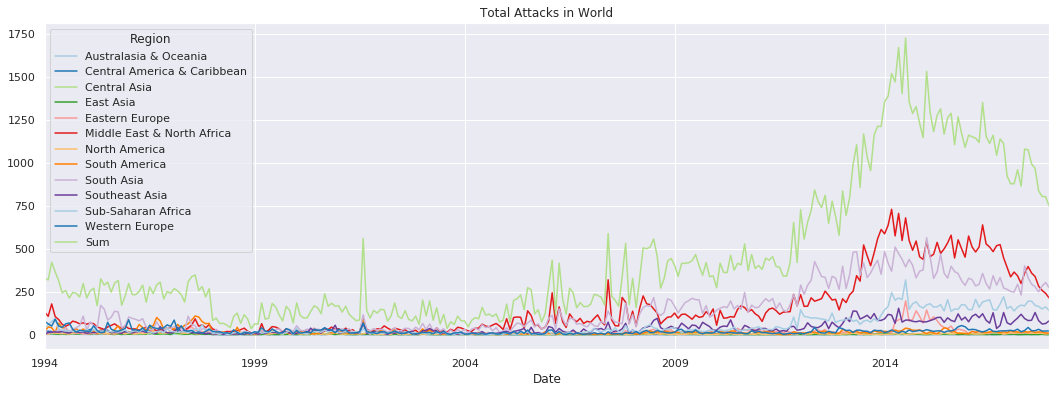

In [77]:
world_94on.plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Total Attacks in World')
plt.show()

In [0]:
from statsmodels.tsa import stattools as st
from statsmodels.tsa.stattools import acf

In [79]:
sum_acf=acf(world_94on.Sum)
sum_acf

array([1.        , 0.95766028, 0.95490451, 0.94821524, 0.93568012,
       0.92454214, 0.92042945, 0.90631975, 0.89249344, 0.89071735,
       0.87687652, 0.8649706 , 0.86300921, 0.84351145, 0.83378184,
       0.81631214, 0.80086333, 0.78250875, 0.77518625, 0.75595745,
       0.73976278, 0.73526533, 0.71723547, 0.70000232, 0.68753358,
       0.67139082, 0.65414443, 0.63961246, 0.62008569, 0.59692726,
       0.58068118, 0.55692089, 0.54271467, 0.525556  , 0.51709533,
       0.49830631, 0.48698383, 0.46722598, 0.45192122, 0.43815652,
       0.41723172])

In [0]:
world_94on.to_csv('worldattack_94on.csv')

In [95]:
monthly_world_attacks.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe,Sum
Date,,,,,,,,,,,,,
1969-11-30,0,0,0,0,0,0,1,0,0,0,0,0,1
1969-12-31,0,0,0,1,0,0,0,0,0,1,0,1,3
1970-01-31,0,1,0,0,2,0,26,3,0,2,1,1,36
1970-02-28,0,0,0,0,0,1,50,0,0,1,0,4,56
1970-03-31,0,3,0,1,0,2,54,3,0,1,2,3,69


In [0]:
monthly_world_attacks.to_csv('worldattacks.csv')